In [ ]:
#from https://www.kaggle.com/code/niklasdonges/end-to-end-project-with-python

In [50]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score


# Loading data

In [4]:
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [6]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
happy = data[data['Y'] == 1]
unhappy = data[data['Y'] == 0]

print(len(happy))
print(len(unhappy))

69
57


54% of the data set is Y = 1, aka happy. There are 126 entries and 6 features: X1-X6

In [9]:
data.head(15)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Y,0,0.0
X1,0,0.0
X2,0,0.0
X3,0,0.0
X4,0,0.0


No missing data

In [15]:
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']

Text(0.5, 1.0, 'X1')

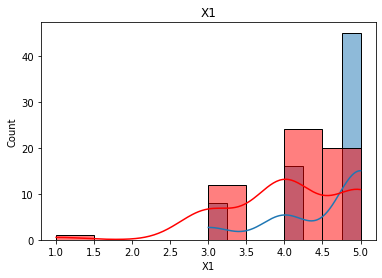

In [40]:
feature = 'X1'
ax = sns.histplot(data=happy, x=feature, kde=True)
ax = sns.histplot(data=unhappy, x=feature, kde=True, color = 'r')
ax.set_title(feature)  

Text(0.5, 1.0, 'X2')

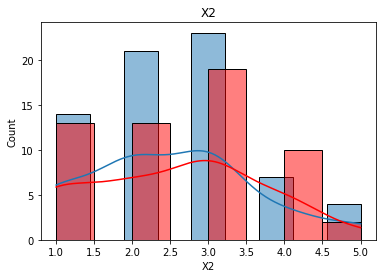

In [41]:
feature = 'X2'
ax = sns.histplot(data=happy, x=feature, kde=True)
ax = sns.histplot(data=unhappy, x=feature, kde=True, color = 'r')
ax.set_title(feature)

Text(0.5, 1.0, 'X3')

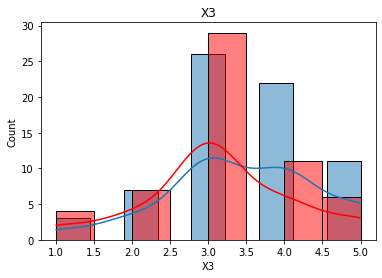

In [42]:
feature = 'X3'
ax = sns.histplot(data=happy, x=feature, kde=True)
ax = sns.histplot(data=unhappy, x=feature, kde=True, color = 'r')
ax.set_title(feature)

Text(0.5, 1.0, 'X4')

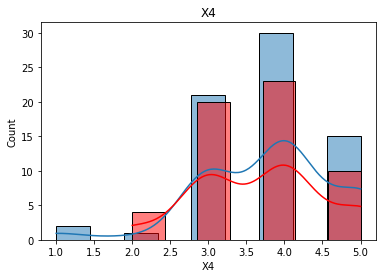

In [43]:
feature = 'X4'
ax = sns.histplot(data=happy, x=feature, kde=True)
ax = sns.histplot(data=unhappy, x=feature, kde=True, color = 'r')
ax.set_title(feature)

Text(0.5, 1.0, 'X5')

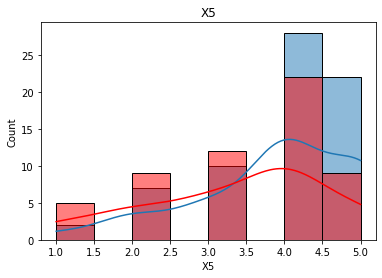

In [44]:
feature = 'X5'
ax = sns.histplot(data=happy, x=feature, kde=True)
ax = sns.histplot(data=unhappy, x=feature, kde=True, color = 'r')
ax.set_title(feature)

Text(0.5, 1.0, 'X6')

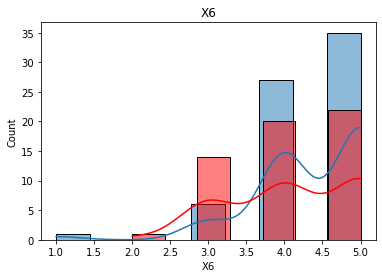

In [45]:
feature = 'X6'
ax = sns.histplot(data=happy, x=feature, kde=True)
ax = sns.histplot(data=unhappy, x=feature, kde=True, color = 'r')
ax.set_title(feature)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


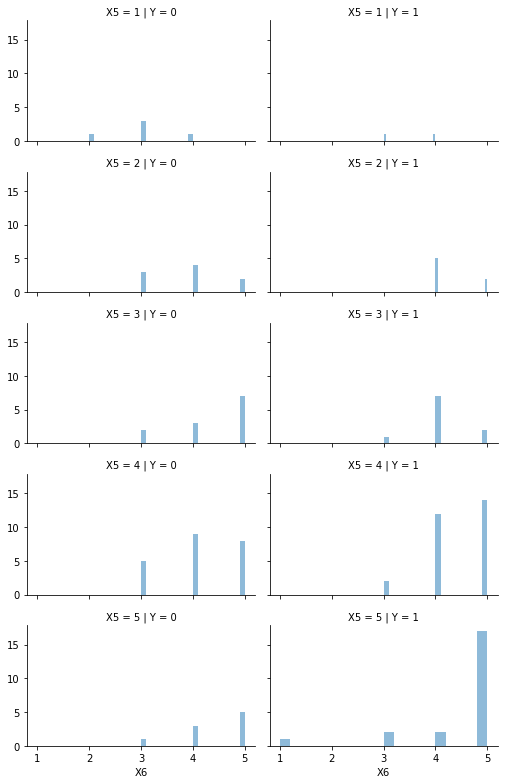

In [133]:
grid = sns.FacetGrid(data, col='Y', row='X5', size=2.2, aspect=1.6)
grid.map(plt.hist, 'X6', alpha=.5, bins=20)
grid.add_legend();

In [52]:
X = data[feature_cols]
y = data.Y 

In [53]:
#filter features by importance

# Perform feature selection using the chi2 method
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature importances based on the chi2 scores
scores = selector.scores_

# Create a dataframe with the feature names and their importances
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': scores})

# Sort the dataframe by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)

  Feature  Importance
4      X5    2.273286
0      X1    1.449041
2      X3    0.900104
5      X6    0.541070
3      X4    0.106194
1      X2    0.036161


# Building ML models

In [122]:
#test different models on data
def compare_models(X_train, X_test, y_train, y_test):
    d = {}
    print('Difference in model accuracy')
    # Create a Logistic Regression classifier
    clf = LogisticRegression(random_state=16)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Logistic regression"
    d[k] =  accuracy
    print(k, accuracy)

    # Create a KNN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "KNN"
    d[k] =  accuracy
    print(k, accuracy)

    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Decision tree"
    d[k] =  accuracy
    print(k, accuracy)

    # Create a Random Forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Random forest"
    d[k] =  accuracy
    print(k, accuracy)

    #Create a Gradient Boosting classifier
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Gradient Boosting"
    d[k] =  accuracy
    print(k, accuracy)

    #Create an XGBoost classifier

    params = {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1}
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "XGBoost"
    d[k] =  accuracy
    print(k, accuracy)
    
    max_k = max(d, key=lambda key: d[key])
    print("Max is", max_k, "with", d[max_k])


In [125]:
#different test sets splits
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=16)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [126]:
print("Original data with 0.2 test size")
compare_models(X1_train, X1_test, y1_train, y1_test)
print("\nOriginal data with 0.25 test size")
compare_models(X2_train, X2_test, y2_train, y2_test)

Original data with 0.2 test size
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.5
Decision tree 0.5769230769230769
Random forest 0.5769230769230769
Gradient Boosting 0.5769230769230769
XGBoost 0.5
Max is Logistic regression with 0.6538461538461539

Original data with 0.25 test size
Difference in model accuracy
Logistic regression 0.71875
KNN 0.46875
Decision tree 0.53125
Random forest 0.625
Gradient Boosting 0.59375
XGBoost 0.53125
Max is Logistic regression with 0.71875


In [96]:
#try scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[feature_cols])

X3_train, X3_test, y3_train, y3_test = train_test_split(X_scaled, y, test_size=0.2, random_state=16)
X4_train, X4_test, y4_train, y4_test = train_test_split(X_scaled, y, test_size=0.25, random_state=16)

In [97]:
print("Scaled data with 0.2 test size")
compare_models(X3_train, X3_test, y3_train, y3_test)
print("\nScaled data with 0.25 test size")
compare_models(X4_train, X4_test, y4_train, y4_test)

Scaled data with 0.2 test size
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.5
Decision tree 0.46153846153846156
Random forest 0.5769230769230769
Gradient Boosting 0.5769230769230769
XGBoost 0.5
Max is Logistic regression with 0.6538461538461539

Scaled data with 0.25 test size
Difference in model accuracy
Logistic regression 0.71875
KNN 0.5
Decision tree 0.59375
Random forest 0.625
Gradient Boosting 0.59375
XGBoost 0.53125
Max is Logistic regression with 0.71875


In [130]:
#try by removing features
# since scaling doesnt seem to improve, and test plit of 0.25 gives better accuracy, we will use the original data with 0.25

def drop_feature(data, feature_cols):
    for i in range(len(feature_cols)):
        cols = feature_cols[:]
        cols.pop(i)
        print('\nFeatures:', cols)
        X = data[cols]
        y = data.Y 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
        compare_models(X_train, X_test, y_train, y_test)


In [131]:
drop_feature(data, feature_cols)


Features: ['X2', 'X3', 'X4', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.46153846153846156
Decision tree 0.5
Random forest 0.38461538461538464
Gradient Boosting 0.46153846153846156
XGBoost 0.46153846153846156
Max is Logistic regression with 0.6538461538461539

Features: ['X1', 'X3', 'X4', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.5769230769230769
Decision tree 0.6153846153846154
Random forest 0.6153846153846154
Gradient Boosting 0.5769230769230769
XGBoost 0.6923076923076923
Max is XGBoost with 0.6923076923076923

Features: ['X1', 'X2', 'X4', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.5
Decision tree 0.6153846153846154
Random forest 0.5769230769230769
Gradient Boosting 0.5384615384615384
XGBoost 0.5769230769230769
Max is Logistic regression with 0.6538461538461539

Features: ['X1', 'X2', 'X3', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.615

In [112]:
#try again but alsways remove X2 since it was logest in importance list

In [132]:
drop_feature(data, ['X1', 'X3', 'X4', 'X5', 'X6'])


Features: ['X3', 'X4', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.5
Decision tree 0.5384615384615384
Random forest 0.5384615384615384
Gradient Boosting 0.6153846153846154
XGBoost 0.6153846153846154
Max is Logistic regression with 0.6538461538461539

Features: ['X1', 'X4', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.6538461538461539
KNN 0.5769230769230769
Decision tree 0.6153846153846154
Random forest 0.5769230769230769
Gradient Boosting 0.6153846153846154
XGBoost 0.5769230769230769
Max is Logistic regression with 0.6538461538461539

Features: ['X1', 'X3', 'X5', 'X6']
Difference in model accuracy
Logistic regression 0.7307692307692307
KNN 0.5384615384615384
Decision tree 0.6153846153846154
Random forest 0.6923076923076923
Gradient Boosting 0.7307692307692307
XGBoost 0.6538461538461539
Max is Logistic regression with 0.7307692307692307

Features: ['X1', 'X3', 'X4', 'X6']
Difference in model accuracy
Logistic regression 0.5769

# Results
Removing features X2 and X4 (loweest on the chi square importance) helped bring the accuracy above 73% using logistic regression. These questions can be removed from the questionaire